In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define Perceptron Parameter grid search function.

In [108]:
def grid_search_params():
    parameters = {'max_iter': list(range(20, 201, 10)),
            'l1_ratio': [0.0, 0.05, 0.15, 0.25],
            'penalty': [None, 'l2','l1','elasticnet'],
            'alpha': [0.0001, 0.01, 0.]
    }
    clf = LogisticRegression(fit_intercept = True, C=0.01, max_iter=350, solver='saga')
    cv = StratifiedKFold(n_splits = 3, shuffle = True)
    gridsearch = GridSearchCV(clf, parameters, n_jobs = 12, cv = cv, scoring = 'roc_auc',
                                      verbose = 2, refit = True)

    _, _, train_set, train_label = get_samples("./data/train1_icu_data.csv", "./data/train1_icu_label.csv", ret_raw = True)
    gridsearch.fit(train_set, train_label.ravel())

    print(gridsearch.best_estimator_)

Load training and testing dataset from dataset 1.

In [109]:
clf = clf = LogisticRegression(fit_intercept = True, C=0.01, max_iter=350, solver='saga')

_, _, train_set, train_label = get_samples("./data/train1_icu_data.csv", "./data/train1_icu_label.csv", ret_raw = True)
_, _, raw_test, test_labels = get_samples("./data/test1_icu_data.csv", "./data/test1_icu_label.csv", ret_raw = True)

white_train_set = data_whitening(train_set)
white_test_set = data_whitening(raw_test)

In [110]:
clf.fit(white_train_set, train_label.ravel())

train_pred = clf.predict(white_train_set)
test_pred = clf.predict(white_test_set)

After direct fitting and testing, we perform cross validation.

In [111]:
cv_score = cross_val_score(clf, white_train_set, train_label.ravel(), cv = 5)

In [112]:
train_set_acc = acc_calculate(train_pred, train_label)
test_set_acc = acc_calculate(test_pred, test_labels)

print("From dataset 1:")
print("Train set accuracy: %f, train set error rate: %f"%(train_set_acc, 1 - train_set_acc))
print("Test set accuracy: %f, test set error rate: %f"%(test_set_acc, 1 - test_set_acc))
print("Cross validation score: ", cv_score)
print(clf.coef_)

From dataset 1:
Train set accuracy: 0.796200, train set error rate: 0.203800
Test set accuracy: 0.783045, test set error rate: 0.216955
Cross validation score:  [0.782 0.781 0.811 0.783 0.771]


> Train set accuracy: 0.730600, train set error rate: 0.269400 
> Test set accuracy: 0.714676, test set error rate: 0.285324

In [113]:
_, _, train_set, train_label = get_samples("./data/train2_icu_data.csv", "./data/train2_icu_label.csv", ret_raw = True)
_, _, raw_test, test_labels = get_samples("./data/test2_icu_data.csv", "./data/test2_icu_label.csv", ret_raw = True)

white_train_set = data_whitening(train_set)
white_test_set = data_whitening(raw_test)

In [114]:
clf.fit(white_train_set, train_label.ravel())

train_pred = clf.predict(white_train_set)
test_pred = clf.predict(white_test_set)

# If we don't predict proba and use predicted labels (binary) for ROC plotting, then we will have only three points for the plot
test_pred_proba = clf.predict_proba(white_test_set)
cv_score = cross_val_score(clf, white_train_set, train_label.ravel(), cv = 5)

train_set_acc = acc_calculate(train_pred, train_label)
test_set_acc = acc_calculate(test_pred, test_labels)

print("From dataset 2:")
print("Train set accuracy: %f, train set error rate: %f"%(train_set_acc, 1 - train_set_acc))
print("Test set accuracy: %f, test set error rate: %f"%(test_set_acc, 1 - test_set_acc))
print("Cross validation score: ", cv_score)
print(clf.coef_)

From dataset 2:
Train set accuracy: 0.983051, train set error rate: 0.016949
Test set accuracy: 0.795556, test set error rate: 0.204444
Cross validation score:  [0.97966102 0.94576271 0.97627119 0.96949153 0.97966102]


Here I start to plot the ROC-AUC curve of Logistic regression classifier

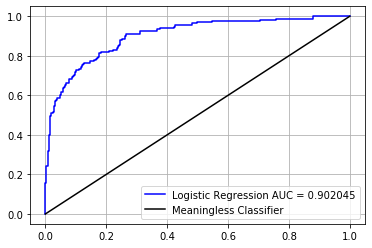

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

FP_r, TP_r, thes = roc_curve(test_labels, test_pred_proba[:, 1], drop_intermediate = False)
auc_value = auc(FP_r, TP_r)

plt.plot(FP_r, TP_r, label = 'Logistic Regression AUC = %f'%(auc_value), c = 'b')
plt.plot([0., 1.], [0., 1.], label = 'Meaningless Classifier', c = 'k')
plt.legend()
plt.grid(axis = 'both')
plt.show()